In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np

In [2]:
# file csv to panda

nom_du_fichier_csv = '/Users/marche/Documents/Centrale 3A/Apprentissage_Automatique_Project/Python_files/csv_files/train_bdd_clean.csv'
data = pd.read_csv(nom_du_fichier_csv)

In [4]:
#choose here the label you want to train for among the following list;["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"]:

label = "prct_cause_infra"


data_prct = (
    data.copy()
        .drop(
            ["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"],
            axis=1,
        )
    )

y = data[label]
X = data_prct

# Diviser le jeu de données en ensembles d'entraînement et de test

separation_date = 2023

# Masque pour les données de test (annee == 2023)
test_mask = (data['annee'] == separation_date)

# Masque pour les données d'entraînement (annee < 2023)
train_mask = (data['annee'] < separation_date)

# Séparez les données en ensembles d'entraînement et de test
X_train = data_prct[train_mask]
y_train = y[train_mask]
X_test = data_prct[test_mask]
y_test = y[test_mask]

In [5]:
#correlation entre les features et le label sélectionné:

correlation_matrix = X.corrwith(y)

pd.set_option('display.max_rows', None)

# Afficher le vecteur de corrélation
abs_mat = correlation_matrix.abs()

sorted_correlation = abs_mat.sort_values(ascending=False)

print(sorted_correlation)

ARRIVEE_PARIS MONTPARNASSE                0.187164
Longitude_depart                          0.122999
national_service                          0.109501
annee                                     0.101507
nb_de_voies_depart                        0.100826
Distance (km)                             0.100286
DEPART_PARIS EST                          0.089236
Longitude_arrivee                         0.086242
DEPART_MARSEILLE ST CHARLES               0.081075
ARRIVEE_MADRID                            0.076220
ARRIVEE_STUTTGART                         0.067749
retard_moyen_arrivee                      0.067615
ARRIVEE_PARIS NORD                        0.063833
DEPART_LE MANS                            0.063623
DEPART_POITIERS                           0.060101
ARRIVEE_TOURCOING                         0.059020
nb_de_voies_arrivee                       0.058869
DEPART_STUTTGART                          0.057998
ARRIVEE_MARSEILLE ST CHARLES              0.056205
nb_train_depart_retard         

In [9]:
# pipeline
random_forest_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de mise à l'échelle
    ('regressor', RandomForestRegressor())  # Utilisez RandomForestRegressor comme modèle de régression
])

157.13270118483624
149.3599560996001
148.6017824549268
163.30733697790453
162.6122582193348
161.31703965066782
161.55439568420698
161.10422654234708
160.7861268897159
161.00768814734352
161.0072353682245
161.92160839888308
161.94263183916425
160.81369897856223
161.92651883506068
162.55474463420677
161.77188296356329
162.18590420289118
162.16524848767494
154.09465722588172
159.08685934554794
161.67673275236626
161.6640965097935
165.42704999001492
162.19134428884416
161.95877960637827
158.4251524788861
161.73879152815314
162.46458870348368
160.22040947209592
161.06905414971
157.82196296329502
159.14573794771005
161.02498500722248
158.86175052166
160.63294521606437
163.04186582587747
156.9235769356078
159.6990131820512
156.49768156247055
157.52201436228086
155.3229578560536
156.91280678119003
160.98401631028906
159.78401363944084
158.06261758759953
157.75969074763665
160.79741484677314
153.14183383841853
155.89314451883578
153.53385810326728
153.1504171084399
153.1432893958181
157.9318643

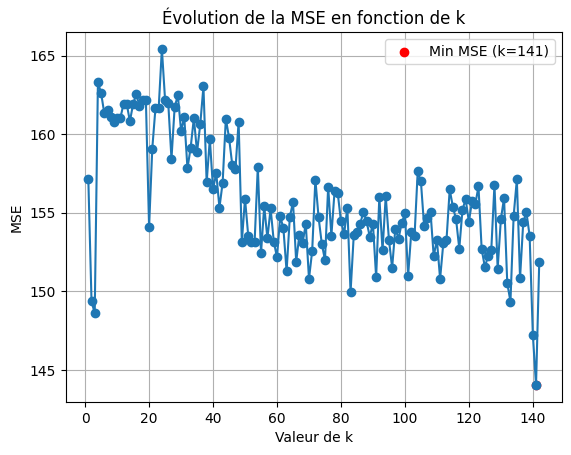

Meilleur k: 141
Meilleure MSE: 144.03750898058541


In [7]:
# Créez des listes pour stocker les scores et les valeurs de k
best_scores = []
best_ks = []
best_mse = np.inf  # Initialisez la meilleure MSE à une valeur maximale

# Créez une liste vide pour stocker les caractéristiques sélectionnées
selected_features = []

# Parcourez les noms de caractéristiques en ordre
for k in range(1, len(X.columns) + 1):
    # Ajoutez le nom de la k-ème caractéristique de sorted_correlation à la liste selected_features
    selected_features.append(sorted_correlation.index[k - 1])

    # Créez la pipeline avec les caractéristiques sélectionnées
    random_forest_regression_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Étape de mise à l'échelle
        ('regressor', RandomForestRegressor())  # Modèle de régression
    ])

    # Entraînez le modèle avec la pipeline
    random_forest_regression_pipeline.fit(X_train[selected_features], y_train)

    # Évaluez le modèle en calculant la MSE
    y_pred = random_forest_regression_pipeline.predict(X_test[selected_features])
    mse = mean_squared_error(y_test, y_pred)

    # Mettez à jour la meilleure MSE et la meilleure valeur de k si nécessaire
    print(mse)
    if mse < best_mse:
        best_mse = mse
        best_k = k

    # Ajoutez la MSE actuelle et la valeur de k aux listes
    best_scores.append(mse)
    best_ks.append(k)

# Créez un graphique de l'évolution de la MSE en fonction de k
plt.figure()
plt.plot(best_ks, best_scores, marker='o')
plt.title("Évolution de la MSE en fonction de k")
plt.xlabel("Valeur de k")
plt.ylabel("MSE")
plt.grid(True)

# Trouvez la valeur de k où la MSE est minimale
min_mse_k = best_ks[np.argmin(best_scores)]
min_mse = min(best_scores)

# Tracez un point à l'emplacement de la MSE minimale
plt.scatter(min_mse_k, min_mse, color='red', label=f'Min MSE (k={min_mse_k})')

# Affichez la légende
plt.legend()

# Affichez le graphique
plt.show()

# Affichez la meilleure valeur de k et la meilleure MSE
print("Meilleur k:", min_mse_k)
print("Meilleure MSE:", min_mse)





In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

# Définissez une grille d'hyperparamètres que vous souhaitez tester
param_grid = {
    'regressor__n_estimators': [10, 50, 100],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

best_features = sorted_correlation.index[:min_mse_k]
X_best= X[best_features]


model = random_forest_regression_pipeline

# Créez l'objet GridSearchCV avec la métrique appropriée (négatif de l'erreur quadratique moyenne)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Effectuez la recherche sur grille en ajustant le modèle aux données
grid_search.fit(X_best, y)

# Obtenez les meilleurs hyperparamètres et la meilleure performance (négatif de l'erreur quadratique moyenne)
best_params = grid_search.best_params_
best_performance = -grid_search.best_score_

# Perform cross-validation on the best model
best_model = grid_search.best_estimator_
cross_val_scores = -cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Imprimez les résultats
print("Meilleurs hyperparamètres:", best_params)
print("Meilleure performance (MSE négatif):", best_performance)
print("Performances de validation croisée (MSE négatif):", cross_val_scores)
print("Moyenne des performances de validation croisée:", np.mean(cross_val_scores))


Meilleurs hyperparamètres: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Meilleure performance (MSE négatif): 223.24438125475314
Performances de validation croisée (MSE négatif): [186.60133187 186.34802133 445.61587952 183.28725449 122.0901613 ]
Moyenne des performances de validation croisée: 224.78852970433658


In [29]:


# Créez la pipeline avec la mise à l'échelle et le modèle Random Forest Regressor en utilisant les meilleurs hyperparamètres
model_final_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de mise à l'échelle (peut être omise si les données sont déjà normalisées)
    ('regressor', RandomForestRegressor(**best_params))  # Modèle Random Forest avec les meilleurs hyperparamètres
])
model_final_pipeline .fit(X_train, y_train)
modele_final_mse = mean_squared_error(y_test, model_final_pipeline .predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : {modele_final_mse:.2f}")

Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : 147.66
